In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from collections import defaultdict
import yaml
from tqdm import tqdm
import pickle
from glob import glob
import matplotlib.pyplot as plt

import scipy.spatial as spa

from Bio.PDB import get_surface, PDBParser, ShrakeRupley, PDBIO, Select
from Bio.PDB.PDBExceptions import PDBConstructionWarning

from bigbind import get_rec_coords, PocketSelect

In [3]:
with open("cfg.yaml", "r") as f:
    cfg = yaml.safe_load(f)

In [4]:
all_overlaps = []
for fname in tqdm(glob(cfg["cache_folder"] + "/*_pocket_overlaps.pkl")):
    with open(fname, "rb") as f:
        all_overlaps.append(pickle.load(f))

100%|███████████████████████████████████████████████████████████████████████████████████| 23290/23290 [00:47<00:00, 494.36it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 23290/23290 [00:00<00:00, 121431.97it/s]


No pockets:  0.026062687848862173
Only one pocket:  0.3377415199656505
2x fraction:  0.8174748089538107


(array([7353., 1762., 1173.,  971.,  837.,  663.,  631.,  545.,  435.,
         417.]),
 array([1.14047193e-05, 1.00010264e-01, 2.00009124e-01, 3.00007983e-01,
        4.00006843e-01, 5.00005702e-01, 6.00004562e-01, 7.00003421e-01,
        8.00002281e-01, 9.00001140e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

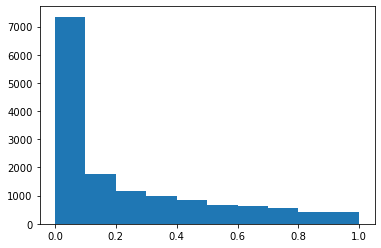

In [5]:
no_pockets = 0
only_one = 0
ratios = []
for overlaps in tqdm(all_overlaps):
    olaps_sorted = sorted(overlaps.items(), key = lambda t: -t[1])
    if len(olaps_sorted) < 2: continue
    (_, top), (_, second) = olaps_sorted[:2]
    if top == 0:
        no_pockets += 1
    else:
        if second == 0:
            only_one += 1
        else:
            ratios.append(second/top)
ratios = np.array(ratios)
            
print("No pockets: ", no_pockets/len(all_overlaps))
print("Only one pocket: ", only_one/len(all_overlaps))
print("2x fraction: ", sum(ratios < 0.5)/len(ratios))
plt.hist(ratios)